## LM331 - Voltage to Frequency Converter

![image](img/lm331.PNG)

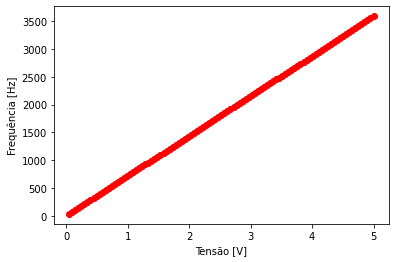

In [1]:
Rs = 8400          # RV1
Rl = 100047        # R4 + R6
Rt = 5600          # R2
Ct = 0.00000001    # C4

import matplotlib.pyplot as plt
freq = []
volts = []
maxV = 5
x = minV = 0.05
points = 100

for i in range(points + 1):
    f = (x/2.09)*(Rs/Rl)*(1/(Rt*Ct))
    volts.append(x)
    freq.append(f)
    x += (maxV-minV)/points

plt.plot(volts, freq, 'ro')
plt.xlabel('Tensão [V]')
plt.ylabel('Frequência [Hz]')
plt.show()

## Divisor resistivo Vin LM331

![image](img/DigiPot.PNG)

In [2]:
Vin = 5
DigiPot = 5000
R5  = 2700

Vout = Vin * (R5/(DigiPot+R5))
print(Vout)

1.7532467532467533


### Cálculo Inverso

In [3]:
Vout = 1.7532467532467533

R5 = Vout * (DigiPot/(Vin-Vout))
print('R5:', R5)

DigiPot = (R5 * (Vin-Vout)) / Vout
print('DigiPot:', DigiPot)

R5: 2700.0
DigiPot: 5000.0


### Cálculo Resistência do DigiPot

![image](img/X9C103S.PNG)

In [4]:
Counts  = 30
DigiPot = Counts * 101
print(DigiPot)

3030


### Cálculo da rotação do motor

In [5]:
Stepping = 1/32
Freq = 1
Velo = (360/(200/Stepping))*Freq

print('Frequência:', Freq, 'Hz')
print('Velocidade:', Velo, '°/s')

Frequência: 1 Hz
Velocidade: 0.05625 °/s


## Modelagem: Counts do DigiPot em função da Velocidade desejada

### 1.0 Equação da Velocidade

In [26]:
# Parâmetros
Stepping = 1/32          # 1/32 microstepping
Rs       = 8400.0        # RV1
Rl       = 100047.0      # R4 + R6
Rt       = 5600.0        # R2
Ct       = 0.00000001    # C4
Vin      = 5.0           # [V]
R5       = 2700.0        # R5

# Counts do DigiPot
Counts   = 43            # counts

# Equações parciais
# DigiPot = 10000-(Counts*101)
# CMIN    = Vin*(R5/(DigiPot+R5))
# Freq    = (CMIN/2.09)*(Rs/Rl)*(1/(Rt*Ct))
# Velo    = (360/(200/Stepping))*Freq

# Equação geral
Velo = (360/(200/Stepping))*(((Vin*(R5/((10000-(Counts*101))+R5)))/2.09)*(Rs/Rl)*(1/(Rt*Ct)))

print('Velocidade:', Velo, '°/s')

Velocidade: 65.1848687789282 °/s


### 2.0 Equação Generalizada

In [27]:
import sympy as sym

_Stepping = sym.Symbol('Stepping')
_Rs       = sym.Symbol('Rs')
_Rl       = sym.Symbol('Rl')
_Rt       = sym.Symbol('Rt')
_Ct       = sym.Symbol('Ct')
_Vin      = sym.Symbol('Vin')
_R5       = sym.Symbol('R5')
_Velo     = sym.Symbol('Velo')
_Counts   = sym.Symbol('Counts')

Eq = ((360/(200/_Stepping))*(((_Vin*(_R5/((10000-(_Counts*101))+_R5)))/2.09)*(_Rs/_Rl)*(1/(_Rt*_Ct))))-_Velo
print('Equação Generalizada: 0 =', Eq)

Equação Generalizada: 0 = -Velo + 0.861244019138756*R5*Rs*Stepping*Vin/(Ct*Rl*Rt*(-101*Counts + R5 + 10000))


### 3.0 Resolução - Counts em função da velocidade

In [39]:
# Parâmetros
Stepping = 1/32          # 1/32 microstepping
Rs       = 8400.0        # RV1
Rl       = 100047.0      # R4 + R6
Rt       = 5600.0        # R2
Ct       = 0.00000001    # C4
Vin      = 5.0           # [V]
R5       = 2700.0        # R5

# Setpoint de Velocidade
Velo     = Velo          # [°/s]

# Extração da equação de Counts
EqCounts = sym.solve(Eq, _Counts)
print('Counts =', EqCounts[0])

# Resolução da equação
Counts = round(sym.solve(Eq.subs([(_Stepping,Stepping),(_Rs,Rs),(_Rl,Rl),(_Rt,Rt),(_Ct,Ct),(_Vin,Vin),(_R5,R5),(_Velo,Velo)]), _Counts)[0])
print('Counts =', Counts)

Counts = 0.0099009900990099*R5 + 99.009900990099 - 0.00852716850632432*R5*Rs*Stepping*Vin/(Ct*Rl*Rt*Velo)
Counts = 43
